In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import glob
import shutil

In [4]:
# file_path = os.getenv('HOME') + '/aiffel/aiffelthon/'
file_path = os.getenv('HOME') + '/aiffel/aiffelthon/meta/'
os.listdir(file_path)

['reg_1.json',
 '.ipynb_checkpoints',
 'kor_text.xlsx',
 'reg_3.json',
 'meta_data_included_raw.csv',
 'meta_data_raw_eng_match_6m.csv',
 'kor_text.txt',
 'reg_4.json',
 'reg_5.json',
 'reg_2.json']

In [7]:
# df = pd.read_csv(file_path + '/final/Train_set_data.csv')
df = pd.read_csv(file_path + 'meta_data_raw_eng_match_6m.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
df.topic.value_counts()

가족            80460
먹거리           59046
회사/학교         42287
여행지(국내/해외)    41018
연애/결혼         39641
건강            36362
취미            23555
성격            21099
아르바이트         20755
꿈(목표)         17212
반려동물          17114
영화            17112
방송/연예         16808
드라마           16615
다이어트          15877
계절            14796
쇼핑            14734
스타일           14417
음악            12470
선물            12109
군대            11990
재테크           11726
역사            11205
스포츠/레저        11137
종교            11096
전자기기          10828
게임            10779
자동차/오토바이       9979
날씨             9347
경제             9328
자격증            8429
콤플렉스           8393
만화             7075
SNS            6241
좌우명            5275
공연             5099
문학             5057
정치             3305
4차산업혁명         3056
법률             2385
Name: topic, dtype: int64

In [16]:
df.loc[df.topic =='4차산업혁명','stdn']

102                                                     그렇지
607                                                     그러게
1008                                                    그니까
1009                                                   그러니까
1433                                                     맞아
                                ...                        
692938              그러니까 이런 게 있다 정도는 괜찮할 거 같고 막 그거를 위한 수업으로
692939                            아직은 조금 그렇다고 생각이 들더라구요 아무튼
692940                                  뭔가 조금 더 아이에게 좀 더 나은
692941    그 흘러가는 방향을 알 수 있기 때문에 인제 그래서 관심을 조금 더 갖게 되었고 그...
692942         그런 것들이 이제 미래에는 에이아이가 대신 이렇게 노동을 해서 벌어 온 수익들을
Name: stdn, Length: 3056, dtype: object

In [4]:
from konlpy.tag import Mecab
mecab = Mecab()

In [203]:
import sentencepiece as spm
def generate_tokenizer(corpus, vocab_size, lang="en", pad_id=0, bos_id=1, eos_id=2, unk_id=3):

    temp_file = os.getenv('HOME') + f'/aiffel/aiffelthon/spm/corpus_{lang}.txt'     # corpus를 받아 txt파일로 저장
    
    with open(temp_file, 'w') as f:
        for row in corpus:
            f.write(str(row) + '\n')
    
    # Sentencepiece를 이용해 
    spm.SentencePieceTrainer.Train(
        f'--input={temp_file} --model_type=bpe --pad_id={pad_id} --bos_id={bos_id} --eos_id={eos_id} \
        --unk_id={unk_id} --model_prefix=spm_{lang}_r1 --vocab_size={vocab_size} \
        --user_defined_symbols=<jj>,<jd>,<gs>,<cc>,<kw>,@이름,@상호명,@웃음 --remove_extra_whitespaces=false'   # model_r1
    )
    
    tokenizer = spm.SentencePieceProcessor()
    tokenizer.Load(f'spm_{lang}_r1.model') # model_r1

    return tokenizer

In [204]:
regs = ['kw','jj','cc','gs','jd']

In [205]:
spm_corpus = df.loc[df['reg'] == regs[0]].sample(frac=1).copy()[:100000]

for reg in regs[1:] :
    temp_corpus = df.loc[df['reg'] == reg].copy()[:100000]
    spm_corpus = pd.concat([spm_corpus,temp_corpus],axis=0)
len(spm_corpus)

500000

In [206]:
train_corpus = spm_corpus['dial'].values
train_corpus[:5]

array(['하먼 주당 이십 불로 올려 주겠어요.', '조회수가 오놀 안에 만 건은 넘을 거 같애.',
       '내가 왜 이딴 말들을 주절거리고 있는지 압니까?', '그래서 그른 것뿐이에요.',
       '그치만 그~ 다쳤을 때만큼은 맨날 한숨만 한솜만 나왔어.'], dtype=object)

In [208]:
tokenizer = generate_tokenizer(train_corpus, 8011, 'dial')
# tokenizer = spm.SentencePieceProcessor()
# tokenizer.Load('spm_dial_r1.model')

In [209]:
df['text'][:10].apply(tokenizer.encode_as_pieces)

0                               [▁생각이, ▁쪼금씩, ▁바뀌, 더라고]
1         [▁어, ▁알, 겠, 는가, ▁외국, 인들이, ▁그래도, ▁잘, ▁적응, 하고]
2    [▁아, 으, ▁갑자기, ▁예전에, ▁맹, 장, ▁뜯, 은, ▁게, ▁생각, 난다, .]
3    [▁보면은, ▁조금, ▁품, 위, ▁있게, ▁나이, ▁들어가, 야, ▁되겠, 단, ...
4      [▁약간, ▁조금, ▁약간, ▁맛이, ▁쪼끔, ▁거시기, ▁하긴, ▁한데, ▁그래도]
5    [▁다른, ▁데, ▁뭐, ~, ▁수영, ▁카페, ▁같은, ▁데, ▁가, ▁보면은, ...
6    [▁그거를, ▁이렇게, ▁깨, 달, 으면서, ▁제가, ▁좋아하는, ▁맛집, 이, ▁...
7         [▁근데, ▁쪘, 다가, ▁또, ▁빠졌, 다가, ▁또, ▁쪘, 다가, ▁이렇게]
8    [▁놀, 이, ▁있냐, ▁이게, ▁플, 레이, 냐, ▁꿈이, 냐, ▁틀리, 잖아, ...
9            [▁모든, ▁종류, 의, ▁기록, 을, ▁, 깼, 다고, ▁하더라고, .]
Name: text, dtype: object

In [210]:
mecab_corpus = []
for i in spm_corpus['dial'].values :
    mecab_corpus.append(' '.join(mecab.morphs(i)).strip())
mecab_corpus[:5]

['하 먼 주 당 이 십 불로 올려 주 겠 어요 .',
 '조 회수 가 오 놀 안 에 만 건 은 넘 을 거 같 애 .',
 '내 가 왜 이딴 말 들 을 주절거리 고 있 는지 압 니까 ?',
 '그래서 그른 것 뿐 이 에요 .',
 '그치만 그 ~ 다쳤 을 때 만큼 은 맨날 한숨 만 한 솜 만 나왔 어 .']

In [211]:
msp_tokenizer = generate_tokenizer(mecab_corpus, 8011, 'msp')

In [212]:
df.loc[df['reg']== reg, ['dial']].values[:5]

array([['생각이 쪼금씩 바뀌드라고'],
       ['어 알겄는가 외국인들이 그래도 잘 적응하고'],
       ['아으 갑자기 예전에 맹장 뜯은 게 생각난디야.'],
       ['보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.'],
       ['약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도']], dtype=object)

In [213]:
#bpe 8000 기준
for reg in regs :
    print(reg)    
    for k in df.loc[df['reg']== reg, ['dial']].values[:5] :
        print('spm: ',tokenizer.encode_as_pieces(k[0]))
        print('msp: ',msp_tokenizer.encode_as_pieces(k[0]))
        print()

kw
spm:  ['▁그런', '▁걸', '▁보면', '▁농', '부', '▁얼굴', '은', '▁함', '박', '삐', '다구', '가', '▁되는', '거지', '.']
msp:  ['▁그런', '▁걸', '▁보', '면', '▁농', '부', '▁얼굴', '은', '▁함', '박', '삐', '다구', '가', '▁되', '는', '거지', '.']

spm:  ['▁홀', '에서는', '▁내', '금', '새', '▁피', '우', '지', '▁마', '.']
msp:  ['▁홀', '에', '서', '는', '▁내금새', '▁피우', '지', '▁마', '.']

spm:  ['▁너', '▁그거', '▁무슨', '▁소', '래기', '냐', '?']
msp:  ['▁너', '▁그거', '▁무슨', '▁소래기', '냐', '?']

spm:  ['▁국민', '들은', '▁과연', '▁어뜬', '▁선택', '을', '▁할', '▁것', '인지', '▁귀', '추', '가', '▁주', '목', '되고', '▁있습니다', '.']
msp:  ['▁국민', '들', '은', '▁과연', '▁어뜬', '▁선택', '을', '▁할', '▁것', '인', '지', '▁귀', '추', '가', '▁주', '목', '되', '고', '▁있', '습', '니다', '.']

spm:  ['▁얼구리', '라도', '▁안', '▁내', '밀', '면', '▁후', '환', '이', '▁두', '렵', '거든', '.']
msp:  ['▁얼구', '리', '라도', '▁안', '▁내밀', '면', '▁후', '환', '이', '▁두렵', '거든', '.']

jj
spm:  ['▁부', '애', '나', '도', '▁막', '▁좋은', '▁말로', '만', '▁해야', '▁되고', '▁막', '▁타', '일', '러', '야', '▁되고']
msp:  ['▁부', '애', '나', '도', '▁막', '▁좋', '은', '▁말', '로', '만', '▁해야', '▁되', 

In [214]:
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.font_manager as fm
from collections import Counter

kw
[(' ', 502486), ('이', 72926), ('.', 63799), ('가', 37920), ('어', 34939), ('는', 32927), ('그', 31965), ('아', 31434), ('지', 30311), ('다', 28312), ('고', 28141), ('하', 26264), ('요', 24062), ('?', 23658), ('나', 22216), ('에', 20687), ('니', 19244), ('서', 18641), ('거', 17558), ('게', 17198), ('도', 16462), ('기', 15603), ('을', 15167), ('데', 14609), ('사', 14555), ('리', 14144), ('라', 13930), ('야', 13803), ('구', 13627), ('은', 13624)]

jj
[(' ', 541941), ('이', 70099), ('그', 41861), ('아', 36420), ('가', 34110), ('거', 31678), ('고', 31087), ('는', 28755), ('어', 26286), ('도', 24941), ('게', 24937), ('하', 24918), ('나', 24229), ('지', 23519), ('.', 23371), ('다', 20967), ('에', 19554), ('해', 16887), ('니', 16835), ('서', 16798), ('기', 16137), ('난', 15123), ('?', 14634), ('라', 14323), ('리', 13759), ('디', 13247), ('은', 12787), ('사', 12619), ('들', 12112), ('안', 11600)]

cc
[(' ', 959053), ('이', 111644), ('그', 97470), ('는', 77692), ('고', 71686), ('가', 65219), ('하', 44376), ('어', 43768), ('서', 42319), ('게', 41413), ('

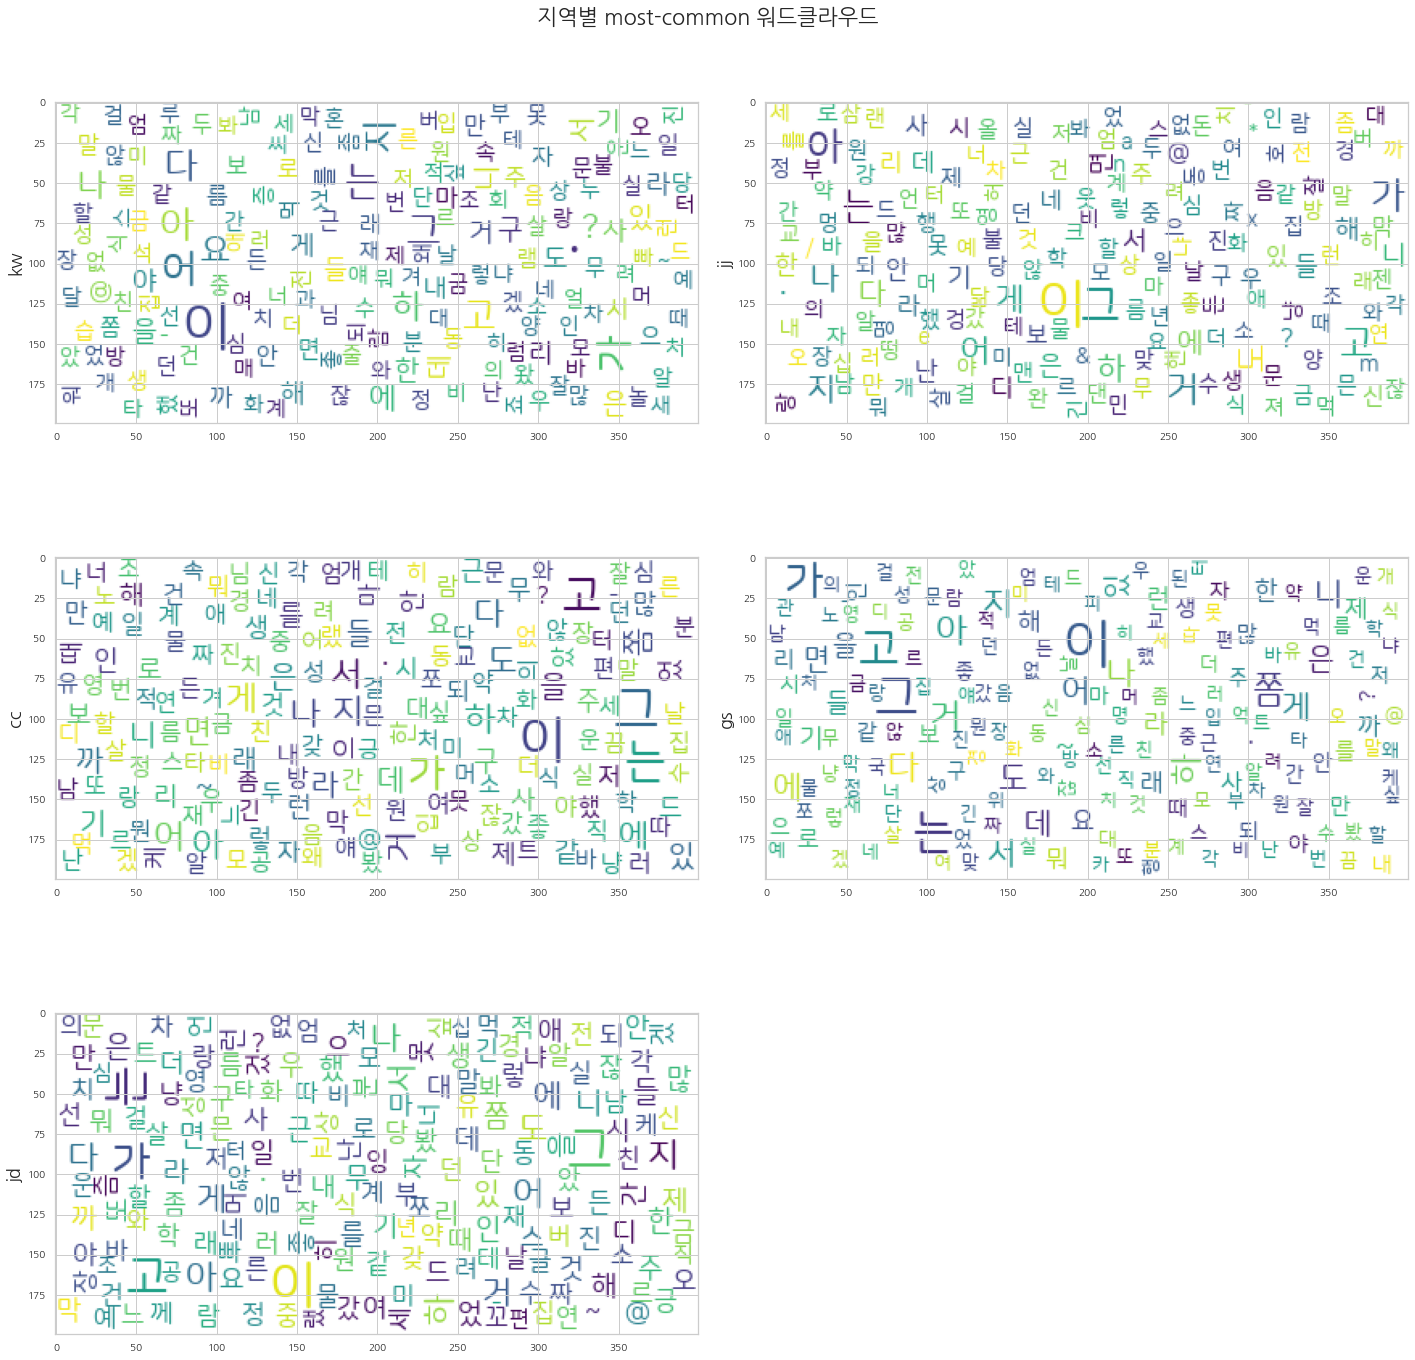

In [215]:
plt.figure(figsize= (20,20))

for i, reg in enumerate(regs) :
    counter = Counter()
    for k in spm_corpus.loc[spm_corpus['reg'] == reg,'dial'].values :
        counter.update(''.join(msp_tokenizer.encode_as_pieces(k)).replace('▁',' ').strip())
    
    print(reg)
    print(counter.most_common(30),end='\n\n')

    # font path http://corazzon.github.io/matplotlib_font_setting
    font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
    font_list[0][1]
    wc = WordCloud(font_path= font_list[0][1], background_color='white',max_font_size=60)
    
    
    cloud = wc.generate_from_frequencies(counter)
    
    plt.subplot(3,2,i+1)
    plt.ylabel(reg)
    plt.imshow(cloud)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.suptitle('지역별 most-common 워드클라우드',  font ='NanumGothic')
plt.tight_layout()
plt.show()

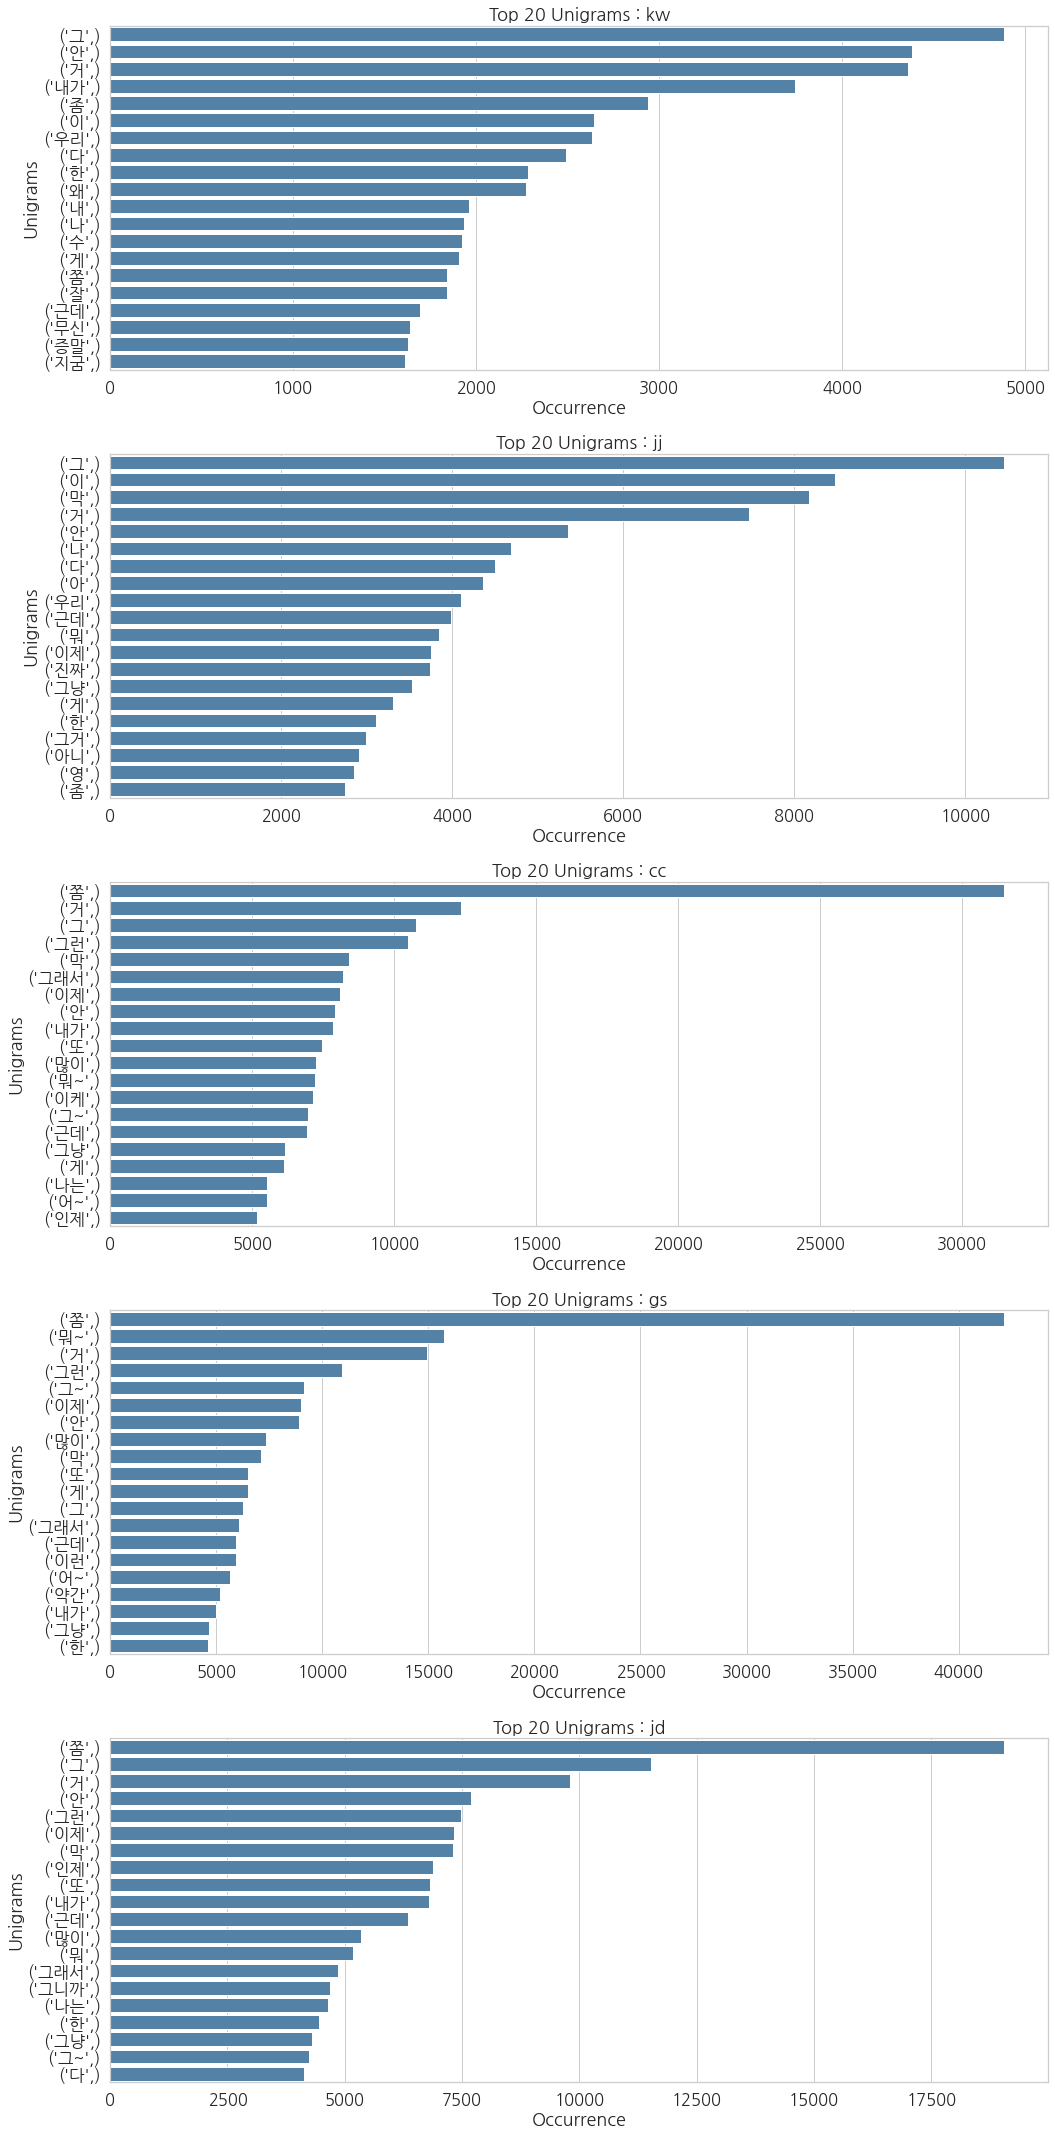

In [216]:
from nltk import ngrams
import seaborn as sns

fig = plt.figure(figsize=(15,30))

for i, reg in enumerate(regs) :
    
    frequency_pos = Counter()
    
    for k in spm_corpus.loc[spm_corpus['reg'] == reg, 'dial'] :
        tokenized = ''.join(msp_tokenizer.encode_as_pieces(k)).replace('▁',' ').split()
        token_words = ngrams(tokenized,1)
        frequency_pos.update(token_words)

    df_pos = pd.DataFrame(frequency_pos.most_common(20))

    # Barplot that shows the top most common
    
    plt.subplot(5,1,i+1)
    sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')
    sns_pos_1 = sns.barplot(x = df_pos[1], y = df_pos[0], color = 'steelblue')

    # Setting axes labels
    sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Unigrams', title = f'Top 20 Unigrams : {reg}')
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

    
plt.tight_layout()
plt.show()

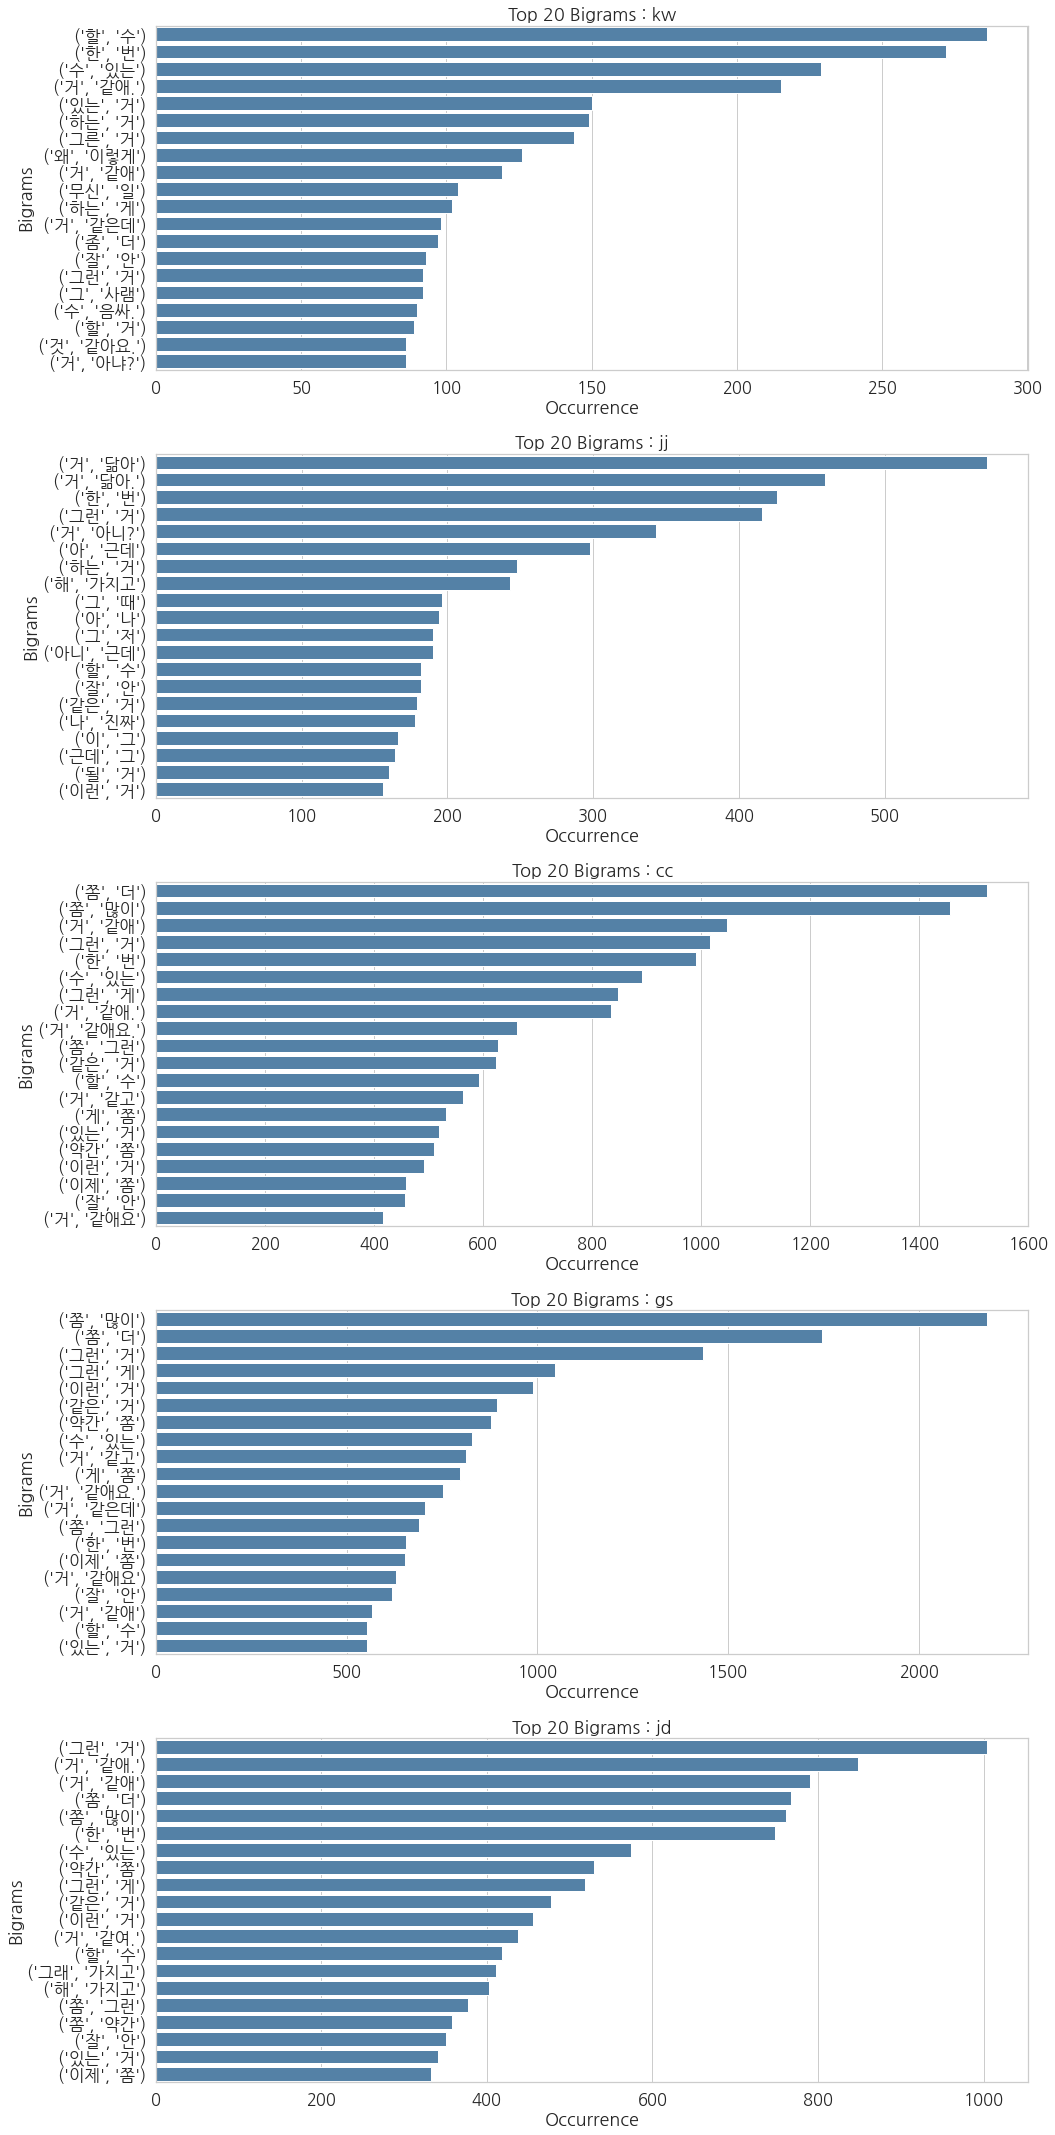

In [217]:
from nltk import ngrams
import seaborn as sns

fig = plt.figure(figsize=(15,30))

for i, reg in enumerate(regs) :
    
    frequency_pos = Counter()
    
    for k in spm_corpus.loc[spm_corpus['reg'] == reg, 'dial'] :
        tokenized = ''.join(msp_tokenizer.encode_as_pieces(k)).replace('▁',' ').split()
        token_words = ngrams(tokenized,2)
        frequency_pos.update(token_words)

    df_pos = pd.DataFrame(frequency_pos.most_common(20))

    # Barplot that shows the top most common
    
    plt.subplot(5,1,i+1)
    sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')
    sns_pos_1 = sns.barplot(x = df_pos[1], y = df_pos[0], color = 'steelblue')

    # Setting axes labels
    sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Bigrams', title = f'Top 20 Bigrams : {reg}')
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

    
plt.tight_layout()
plt.show()

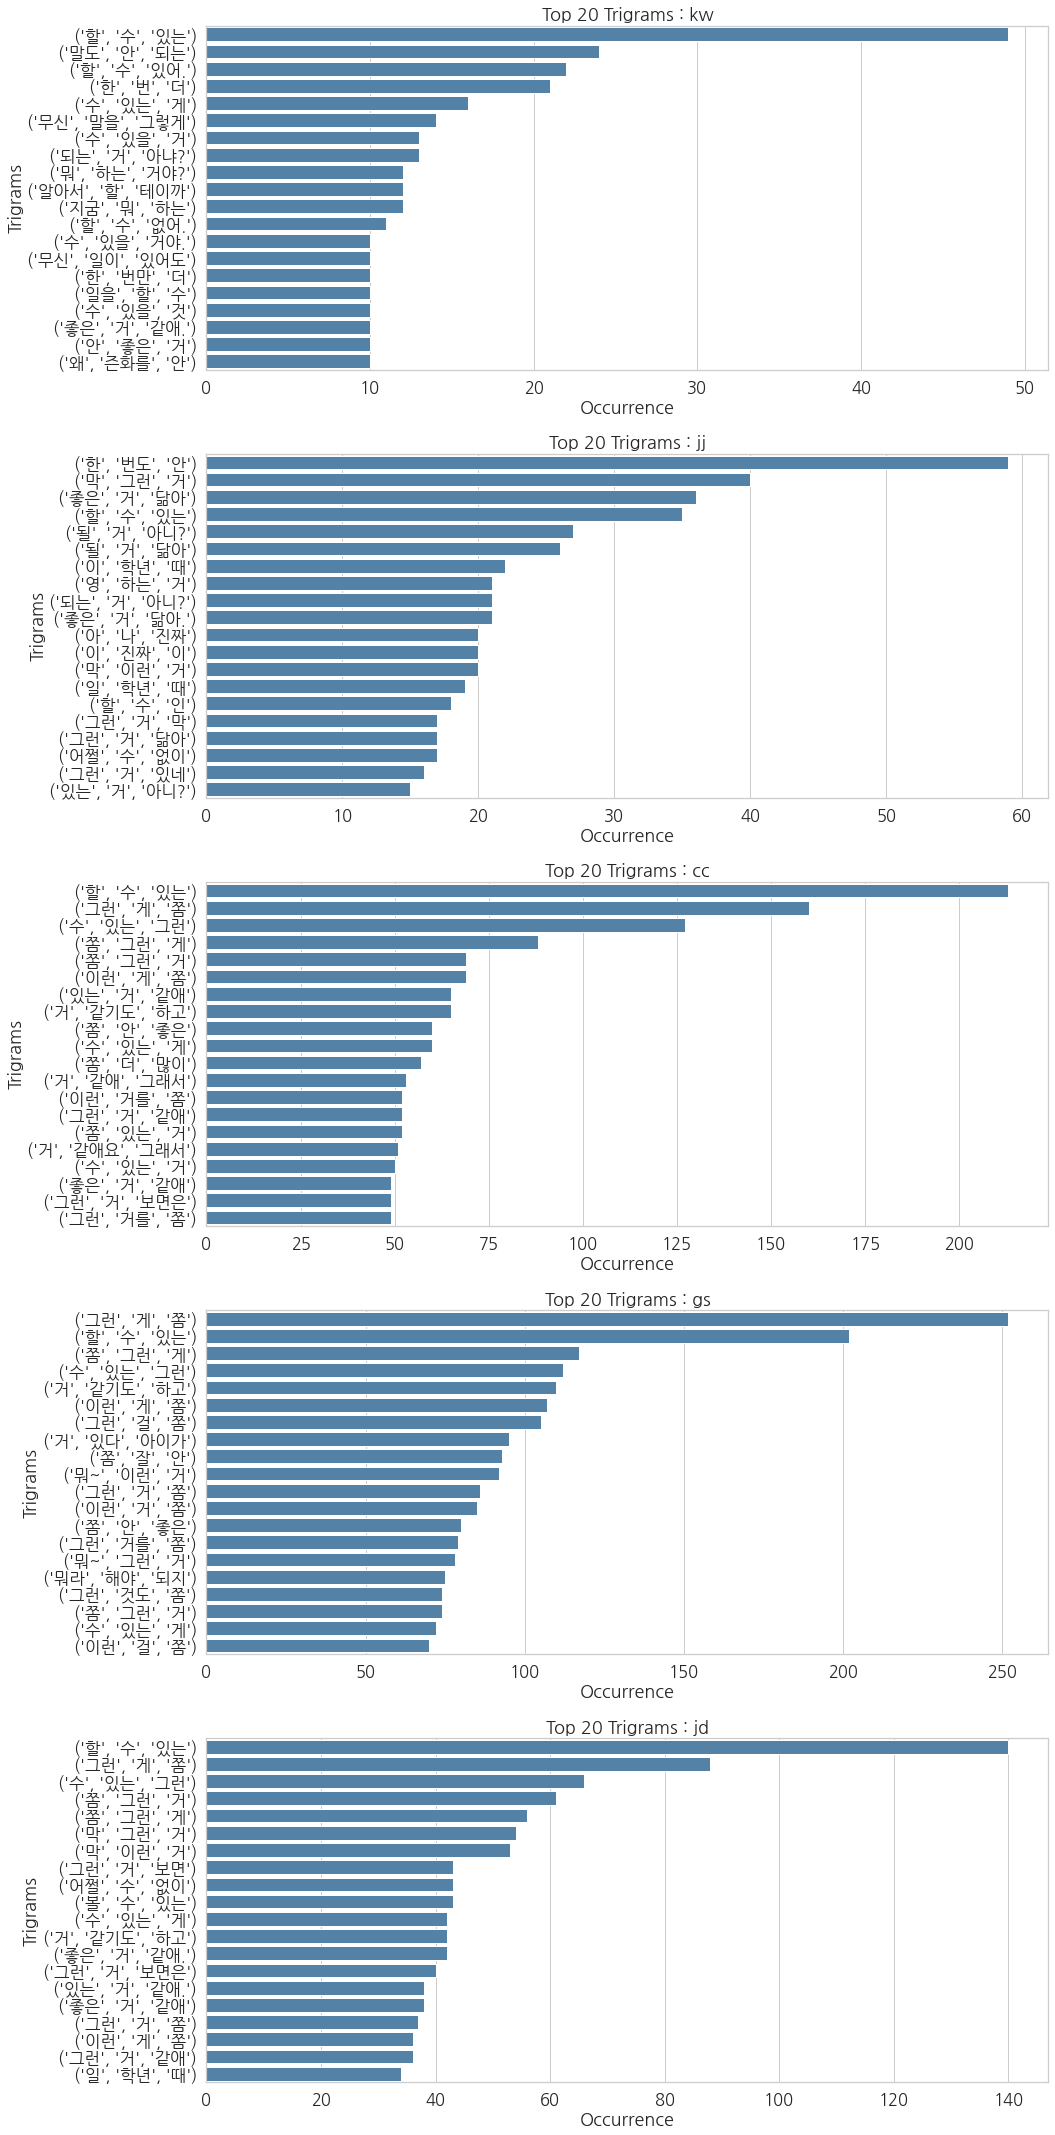

In [218]:
#trigram
fig = plt.figure(figsize=(15,30))

for i, reg in enumerate(regs) :
    
    frequency_pos = Counter()
    
    for k in spm_corpus.loc[spm_corpus['reg'] == reg, 'dial'] :
        tokenized = ''.join(msp_tokenizer.encode_as_pieces(k)).replace('▁',' ').split()
        token_words = ngrams(tokenized,3)
        frequency_pos.update(token_words)

    df_pos = pd.DataFrame(frequency_pos.most_common(20))

    # Barplot that shows the top most common
    
    plt.subplot(5,1,i+1)
    sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')
    sns_pos_1 = sns.barplot(x = df_pos[1], y = df_pos[0], color = 'steelblue')

    # Setting axes labels
    sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Trigrams', title = f'Top 20 Trigrams : {reg}')
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

    
plt.tight_layout()
plt.show()

In [258]:
import re

sign = df['dial'].values
sign_x = []

for i in sign :
    search = re.search(r'(\/)', i)
    if search :
        sign_x.append(search.string)
len(sign_x) # delete them

12916

In [169]:
re.search(r'^(@\D+)',i).string

'@이름씨도 이미 다른 사람하고 결혼해서 잘 살고 있는데'

In [165]:
dir(re.search(r'^(@\D+)',i))

['__class__',
 '__class_getitem__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'end',
 'endpos',
 'expand',
 'group',
 'groupdict',
 'groups',
 'lastgroup',
 'lastindex',
 'pos',
 're',
 'regs',
 'span',
 'start',
 'string']

In [141]:
spm_corpus.loc[(spm_corpus.dial.str.contains('남')) & (spm_corpus.reg == 'gs')]

,text,dial,reg,eng
123856,그~ @웃음 생각이 바로 바뀌었어요 역시 편한 게 최고야 남들 눈에,그~ @웃음 생각이 바로 바꼈어요 역시 편한 게 최고야 남들 눈에,gs,It's the best thing to be comfortable in peopl...
123857,뭐~ 실명 거론은 조금 그렇고 -그- 그런 약간 남을,뭐~ 실명 거론은 쫌 그렇고 -그- 그런 약간 남을,gs,"Well, a little bit of a real-life geron, you k..."
123881,외모 그러니까 베르세르크를 안 본 사람들은 잘 모르겠지만 가츠의 외모는 약간 진짜 ...,외모 그니까 베르세르크를 안 본 사람들은 잘 모르겠지만 가츠의 외모는 약간 진짜 막...,gs,I don't know about those people who didn't see...
123991,이렇게 남한테 선뜻 맡기는 것도 안 좋아하고 제가 다 알고 파는 거를 좋아하거든요.,이케 남한테 선뜻 맡기는 것도 안 좋아하고 제가 다 알고 파는 거를 좋아하거든요.,gs,"I don't like to give people attention, and I l..."
124074,그러니까 그 남자 친구가 요즘에는 남자 친구들이 보면,그니까 그 남자 친구가 요즘에는 남자 친구들이 보면,gs,"I mean, he's got a boyfriend who's been lookin..."
...,...,...,...,...
981708,그래가지고 거기서 살아남는 내용인데 근데 되게 그 주인공이 조금 긍정적인 게 뭐냐면,그래가지고 거기서 살아남는 내용인데 근데 되게 그 주인공이 쫌 긍정적인 게 뭐냐면,gs,So its about surviving there but the main char...
981778,영화를 본 거보다 훨씬 더 큰 여운이 남아가지고 나는 엄청 조금 재밌게 보고,영화를 본 거보다 훨씬 더 큰 여운이 남아가지고 나는 엄청 쫌 재밌게 보고,gs,Ita left a much louder impression than watchin...
982036,남해는 그래도 거제도보다는 볼 게 조금 있는 거 같애요.,남해는 그래도 거제도보다는 볼 게 쫌 있는 거 같애요.,gs,I think Namhae has a little more to see than G...
982190,나태해지기도 하고 조금 그러 그러는 편이긴 한데 그래도 뭐~ 남들 보기에는 좀,나태해지기도 하고 쫌 그러 그러는 편이긴 한데 그래도 뭐~ 남들 보기에는 좀,gs,Imend being indolent and a little bit like tha...


In [121]:
import soynlp
from konlpy.tag import Mecab
mecab = Mecab()

In [131]:
directory = os.getenv('HOME') + '/aiffel/aiffelthon/'

In [132]:
saturi_dict = pd.read_csv(directory+'saturi_crawling_thesaurus_0223.csv')
saturi_dict

,dial,original,meaning,reg
0,분쉬,분수,"분수의 방언, 사물을 분별하는 지혜.",jj
1,분시,분수,"분수의 방언, 사물을 분별하는 지혜.",jj
2,분절,분결,"분결의 방언, 분한 마음이 왈칵 일어난 바람.",jj
3,분채,부채,"부채의 방언, 손으로 흔들어 바람을 일으키는 물건. 대오리로 살을 하고 종이나 헝...",jj
4,분채질,부채질,"부채질의 방언, 부채를 흔들어 바람을 일으키는 일.",jj
...,...,...,...,...
82396,대근하다,고단하다,"고단하다의 방언, 몸이 지쳐서 느른하다.",cc
82397,대무하다,크다,"크다의 방언, 사람이나 사물의 외형적 길이, 넓이, 높이, 부피 따위가 보통 정도...",cc
82398,대장실하다,담차다,"담차다의 방언, 겁이 없이 대담하고 여무지다.",cc
82399,덜퍽시다,덜퍽지다,"덜퍽지다의 방언, 푸지고 탐스럽다.",cc


In [148]:
saturi_dict.reg.value_counts()

gs    25859
jd    18487
jj    16794
kw    15075
cc     6186
Name: reg, dtype: int64

In [147]:
saturi_dict.loc[saturi_dict['dial'] =='가냘쁘다']

,dial,original,meaning,reg
78759,가냘쁘다,가냘프다,"가냘프다의 방언, 몸이나 팔다리 따위가 몹시 가늘고 연약하다.",cc


In [126]:
train_corpus_v1[:4]

['오후 가 되 자 싸락눈 은 목화솜 처럼 부드러운 박석 눈 으로 변했 다 .',
 '그래도 병원 에 도 안 가 보 고 그 ~ 돈 벌 러 댕기 느라고',
 '뭐 얻 어 처묵 을 끼 있 다꼬 여 오노 ?',
 '내 가 그 친구 한테 철썩 같이 약속 을 했 어요 . 글구 솔직히 상품 본부 장 이 그 정도 인사 권 도 못 갖 나 ?']

In [104]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(train_corpus_v1)

training was done. used memory 2.097 Gbse memory 2.150 Gb


In [105]:
word_score = word_extractor.extract()

all cohesion probabilities was computed. # words = 131273
all branching entropies was computed # words = 167989
all accessor variety was computed # words = 167989


In [119]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score.items()}
l_tokenizer = LTokenizer(scores=scores)

l_tokenizer.tokenize("내가 그 친구한테 철썩 같이 약속을 했어요.글구 솔직히 상품 본부장이 그 정도 인사권도 못 갖나?", flatten=False)

[('내가', ''),
 ('그', ''),
 ('친구', '한테'),
 ('철썩', ''),
 ('같이', ''),
 ('약속을', ''),
 ('했어요.', '글구'),
 ('솔직히', ''),
 ('상품', ''),
 ('본부장이', ''),
 ('그', ''),
 ('정도', ''),
 ('인사권도', ''),
 ('못', ''),
 ('갖나?', '')]

In [120]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("인사권도")

['인사권도']